## Extract meme text from the image

In [59]:
# load data

import pandas as pd

meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")
meme_df['filetype'] = meme_df.url.apply(lambda x: x.split('.')[-1])
meme_df['filetype'] = meme_df['filetype'].apply(lambda x: x if len(x) <= 4 else 'jpg')
meme_df['filename'] = meme_df['id'] + '.' + meme_df['filetype']
meme_df.head()

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_17276/681505498.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


,Unnamed: 0,id,title,text,score,num_comments,over18,url,date,IDURL,filetype,filename
0,612615,2021.02.15_288,Wait I didn't mean it like that,NaN,211152,1642,False,https://i.redd.it/n4ildkpurph61.png,2021-02-15,Wait I didn't mean it like thathttps://i.redd....,png,2021.02.15_288.png
1,545780,2020.10.20_959,Don't be mad,NaN,207206,811,False,https://i.redd.it/gsqgq6uwuau51.jpg,2020-10-20,Don't be madhttps://i.redd.it/gsqgq6uwuau51.jpg,jpg,2020.10.20_959.jpg
2,385925,2020.01.18_675,For real tho,NaN,207066,1734,False,https://i.redd.it/eg4t9kvlplb41.jpg,2020-01-18,For real thohttps://i.redd.it/eg4t9kvlplb41.jpg,jpg,2020.01.18_675.jpg
3,468558,2020.06.09_755,Right as rain after that,NaN,187936,743,False,https://i.redd.it/1wniz8ionv351.jpg,2020-06-09,Right as rain after thathttps://i.redd.it/1wni...,jpg,2020.06.09_755.jpg
4,485415,2020.07.08_336,Licensed Dad Joke,NaN,182056,616,False,https://i.redd.it/nrj9smsfek951.jpg,2020-07-08,Licensed Dad Jokehttps://i.redd.it/nrj9smsfek9...,jpg,2020.07.08_336.jpg


## Using pytesseract
Tutorial Link: https://towardsdatascience.com/read-text-from-image-with-one-line-of-python-code-c22ede074cac

In [2]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

In [3]:
filepath = './Data/Memes/meme_2.jpg'
img = cv2.imread(filepath)
text = pytesseract.image_to_string(img)
print(text)

er Sh
@ 1 Award

I'm a dude, and | fucking hate when people tell me | look tired or
angry. Like, I'm just standing here. What the fuck?

Reply
@ \Otemam—,

2B, 8 & @ 6 Awards

You sound angry.

@r Sage 5h
Se (S] @& 4 Awards

| bet it's because he's tired.




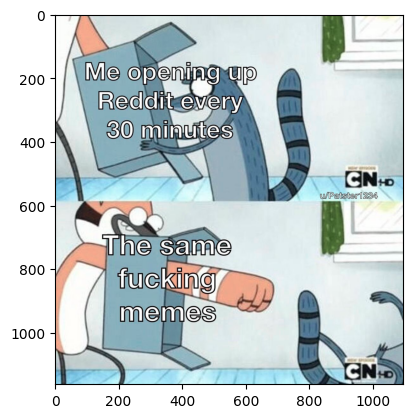

In [4]:
# test: no text, text, couldn't open
filename = meme_df.at[2, 'filename']
path_to_file = str('/Volumes/ADATA HD710 PRO/Memes2022Final2/' + filename)
img = cv2.imread(path_to_file)
image = cv2.imread(path_to_file, cv2.IMREAD_GRAYSCALE) 
cv2.dilate(image, (5, 5), image)
plt.imshow(img)
plt.show()

In [5]:
text = pytesseract.image_to_string(image)
print(text)

In [6]:
# as a function
def get_meme_text(filename):
    try:
        path_to_file = str('/Volumes/ADATA HD710 PRO/Memes2022Final2/' + filename)
        image = cv2.imread(path_to_file, cv2.IMREAD_GRAYSCALE) 
        cv2.dilate(image, (5, 5), image)
        text = pytesseract.image_to_string(image)
    except:
        text = 'ERROR'
    return text

In [7]:
# test function
meme_texts = []

for i in range(0,10):
    filename = meme_df.at[i, 'filename']
    text = get_meme_text(filename)
    meme_texts.append(text)

meme_texts

["High schooler: I'd kill for\ncollege tuition\nUS military recruiters:\n\nPD\n\nu/beakf\nYou will?\n",
 "@ renk. 5\n@ 1 Award\n\nI'm a dude, and | fucking hate when people tell me | look tired or\nangry. Like, I'm just standing here. What the fuck?\n\nReply ® 8.1k\n\n6 ee.\n2 © A @ 6 Awards\n\nYou sound angry.\n\n# 77k «\n\n@ Wee\n%& © & 4 awards\n\n| bet it's because he's tired.\n\n",
 '',
 '— :\nMy stomach hurts Bo i\n\n/@\nIt’s probably ghosts <>\n\n»\n} @\nris\nws\nAnyways, here’s your\nprescription cae\noo } ®\nsm\na\n\n',
 'Dads telling jokes at home\n\nDads cling es a work “et\n',
 'Pre-order a game\n\nBuy the game when\nit releases\n\nWait almost a\ndecade so you can\nget it for free\n\n',
 '14 person TUNS Very\n1, and arms back\n\n',
 'Why is it, every time I open reddit,\n\\p==it’s always you three ?\n\n',
 'Me at 2am creating fake scenarios in my\nhead and hurting my own feelings:\n\n',
 'Me playing a new game in 2070: "How do |\nreload again?"\n\nKid: "It\'s Alt+F4"\n\nMe:

In [23]:
# apply function with swifter and save data
meme_df = meme_df[65000:70000]

import swifter
df_with_meme_text = meme_df.filename.swifter.apply(lambda row: get_meme_text(row) if (pd.notnull(row)) else row)

df_with_meme_text = pd.DataFrame(df_with_meme_text)
df_with_meme_text['id'] = meme_df['id']
df_with_meme_text.head()

df_with_meme_text.to_json('meme_text_65000_70000.json')

In [ ]:
# put this in a loop to go thru entire dataframe saving data along the way
import swifter
start = 220000

for i in range(0,900):
    end = start + 1000
    meme_df = meme_df[start:end]
    df_with_meme_text = meme_df.filename.swifter.apply(lambda row: get_meme_text(row) if (pd.notnull(row)) else row)
    #save data
    df_with_meme_text = pd.DataFrame(df_with_meme_text)
    df_with_meme_text['id'] = meme_df['id']
    df_with_meme_text.head()
    save_filename = 'meme_text_' + str(start) + '_' + str(end) + '.json'
    df_with_meme_text.to_json(save_filename)
    #reload data
    meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")
    meme_df['filetype'] = meme_df.url.apply(lambda x: x.split('.')[-1])
    meme_df['filetype'] = meme_df['filetype'].apply(lambda x: x if len(x) <= 4 else 'jpg')
    meme_df['filename'] = meme_df['id'] + '.' + meme_df['filetype']
    #change start
    start = end
    print(start)
    i+=1

Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


221000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


222000


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: bKGD: invalid
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


223000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


224000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


225000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


226000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


227000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


228000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


229000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


230000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


231000


libpng warning: iCCP: extra compressed data
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: extra compressed data


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


232000


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


233000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


234000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: out of place
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


235000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


236000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


237000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


238000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


239000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


240000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


241000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


242000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


243000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


244000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


245000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


246000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


247000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


248000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


249000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


250000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: zTXt: incorrect header check
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


251000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


252000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


253000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


254000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


255000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


256000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
[ WARN:0@24704.757] global loadsave.cpp:244 findDecoder imread_('/Volumes/ADATA HD710 PRO/Memes2022Final2/2022.09.01_32.webp'): can't open/read file: check file path/integrity
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


257000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


258000


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


259000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


260000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


261000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


262000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


263000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


264000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


265000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


266000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: sBIT: invalid
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


267000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


268000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


269000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


270000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


271000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


272000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: sBIT: invalid
libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


273000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


274000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


275000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


276000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


277000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


278000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


279000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: out of place
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


280000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


281000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


282000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


283000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


284000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: sBIT: invalid
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


285000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


286000


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


287000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


288000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


289000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


290000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


291000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


292000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


293000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


294000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


295000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


296000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


297000


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


298000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: cHRM: invalid chromaticities
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


299000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


300000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


301000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


302000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


303000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: extra compressed data
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


304000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


305000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: extra compressed data
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


306000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


307000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


308000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB
libpng warning: iCCP: known incorrect sRGB profile
/var/folders/nt/m5j3lfrj7zv1wxn3grk5rz3c0000gn/T/ipykernel_65136/2723869596.py:15: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meme_df = pd.read_csv('./Data/Memes/memesfinal.csv', delimiter = ",")


309000


Pandas Apply:   0%|          | 0/1000 [00:00<?, ?it/s]

## This is the old technique we used in 2020

In [25]:
import json 
from pandas.io.json import json_normalize

In [47]:
# do this in chunks, 955149 rows total in df
meme_df = meme_df[0:100000]

In [35]:
len(meme_df)

50

In [31]:
meme_df.at[3,'url']

'https://i.redd.it/1wniz8ionv351.jpg'

In [41]:
# using https://ocr.space/OCRAPI to convert immage to text, helloworld was original api key
import requests

def ocr_space_url(url, overlay=False, api_key='607727ba1288957', language='eng'):
    payload = {'url': url,
               'isOverlayRequired': overlay,
               'apikey': api_key,
               'language': language,
               }
    r = requests.post('https://api.ocr.space/parse/image',

                      data=payload,
                      )
    return r.content.decode()

In [42]:
# Sometimes this method works where the other fails because no file with given filename is found

url_link = meme_df.at[0,'url']
json_string = json.loads(ocr_space_url(url_link))
print(json_string)
ocr_meme_text = str(json_string['ParsedResults'][0]['ParsedText'])
print(ocr_meme_text)

{'ParsedResults': [{'TextOverlay': {'Lines': [], 'HasOverlay': False, 'Message': 'Text overlay is not provided as it is not requested'}, 'TextOrientation': '0', 'FileParseExitCode': 1, 'ParsedText': "High schooler: I'd kill for\r\ncollege tuition\r\nUS military recruiters:\r\n", 'ErrorMessage': '', 'ErrorDetails': ''}], 'OCRExitCode': 1, 'IsErroredOnProcessing': False, 'ProcessingTimeInMilliseconds': '359', 'SearchablePDFURL': 'Searchable PDF not generated as it was not requested.'}
High schooler: I'd kill for
college tuition
US military recruiters:



In [43]:
def get_meme_text(url_link):
    try:
        json_string = json.loads(ocr_space_url(url_link))
        ocr_meme_text = str(json_string['ParsedResults'][0]['ParsedText'])
    except:
        ocr_meme_text = 'ERROR'
    return ocr_meme_text

In [48]:
import swifter

df_with_meme_text = meme_df.url.swifter.apply(lambda row: get_meme_text(row) if (pd.notnull(row)) else row)

Pandas Apply:   0%|          | 0/100000 [00:00<?, ?it/s]